# Agglomerative Hierarchical Clustering with Dendrogram 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering


In [5]:

# -----------------------------
# Load the dataset
# -----------------------------
df = pd.read_csv("point.csv")
df.head()



,Point,X,Y
0,A,1,1
1,B,2,1
2,C,4,3
3,D,5,4
4,E,3,4


In [6]:
data = df[["X", "Y"]].values
data

array([[1, 1],
       [2, 1],
       [4, 3],
       [5, 4],
       [3, 4]], dtype=int64)

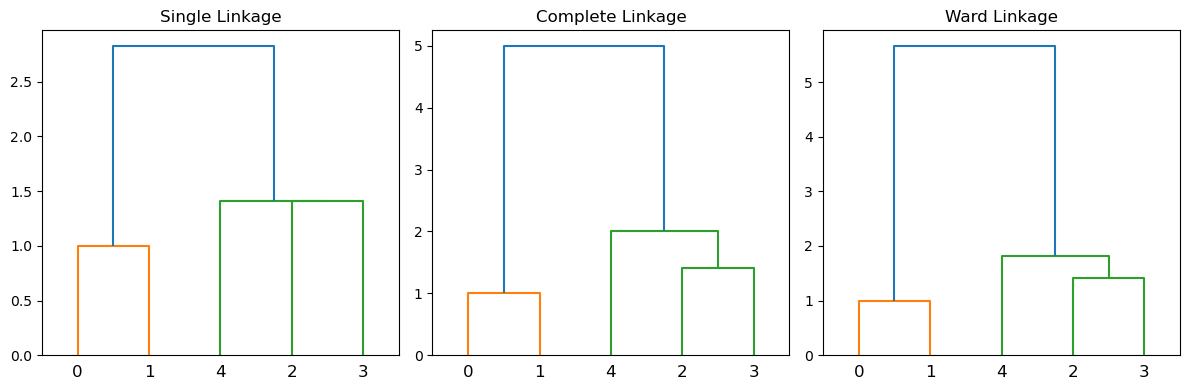

In [7]:

# -----------------------------
# Plot dendrograms (Single, Complete, Ward)
# -----------------------------
plt.figure(figsize=(12, 4))

# Single linkage
plt.subplot(1, 3, 1)
dendrogram(linkage(data, method="single"))
plt.title("Single Linkage")

# Complete linkage
plt.subplot(1, 3, 2)
dendrogram(linkage(data, method="complete"))
plt.title("Complete Linkage")

# Ward linkage
plt.subplot(1, 3, 3)
dendrogram(linkage(data, method="ward"))
plt.title("Ward Linkage")

plt.tight_layout()
plt.show()


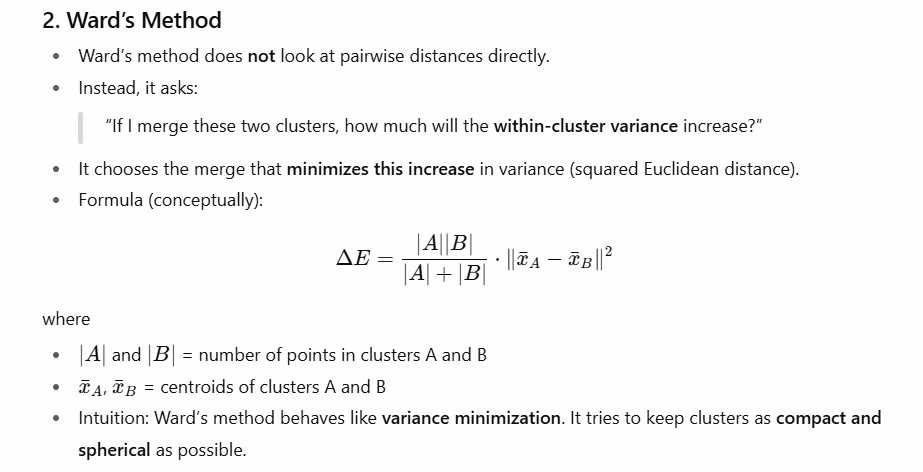

In [8]:

# -----------------------------
# Agglomerative Clustering (Ward linkage, k=2)
# -----------------------------
agg = AgglomerativeClustering(n_clusters=2, linkage="ward")
labels = agg.fit_predict(data)

# Add labels to dataframe
df["Cluster"] = labels
print(df)


  Point  X  Y  Cluster
0     A  1  1        1
1     B  2  1        1
2     C  4  3        0
3     D  5  4        0
4     E  3  4        0


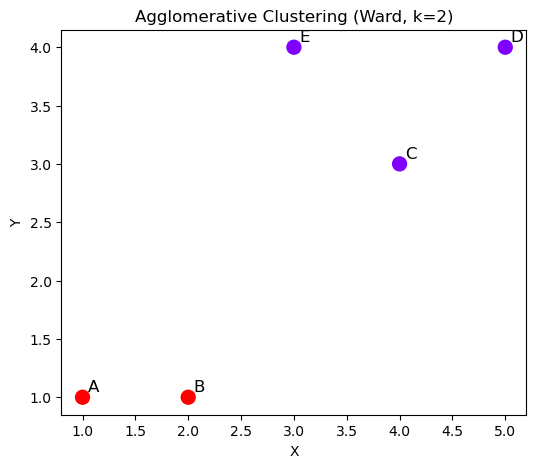

In [9]:

# -----------------------------
# Scatter plot with clusters
# -----------------------------
plt.figure(figsize=(6, 5))
plt.scatter(df["X"], df["Y"], c=labels, cmap="rainbow", s=100)

# Annotate points
for i, row in df.iterrows():
    plt.text(row["X"]+0.05, row["Y"]+0.05, row["Point"], fontsize=12)

plt.title("Agglomerative Clustering (Ward, k=2)")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()
